In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import the necssary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')

LOAD *DATASET* *italicized text*

In [3]:
df=pd.read_csv("/content/drive/MyDrive/Churn_Modelling.csv")
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

UNIVARIATE ANALYSIS

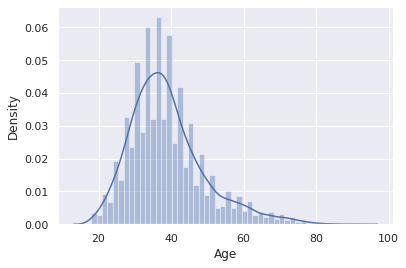

In [5]:
sns.distplot(df['Age'])

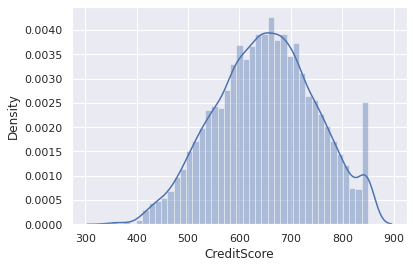

In [6]:
sns.distplot(df['CreditScore'])

BIVARIATE ANALYSIS

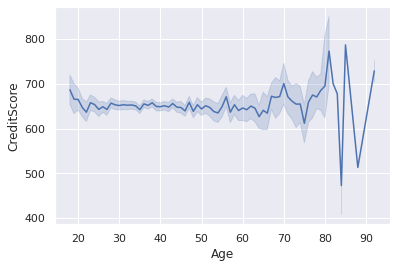

In [8]:
sns.lineplot(x=df['Age'],y=df['CreditScore'])

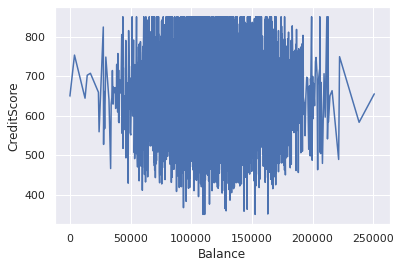

In [9]:
sns.lineplot(x=df['Balance'],y=df['CreditScore'])

MULTIVARIATE ANALYSIS

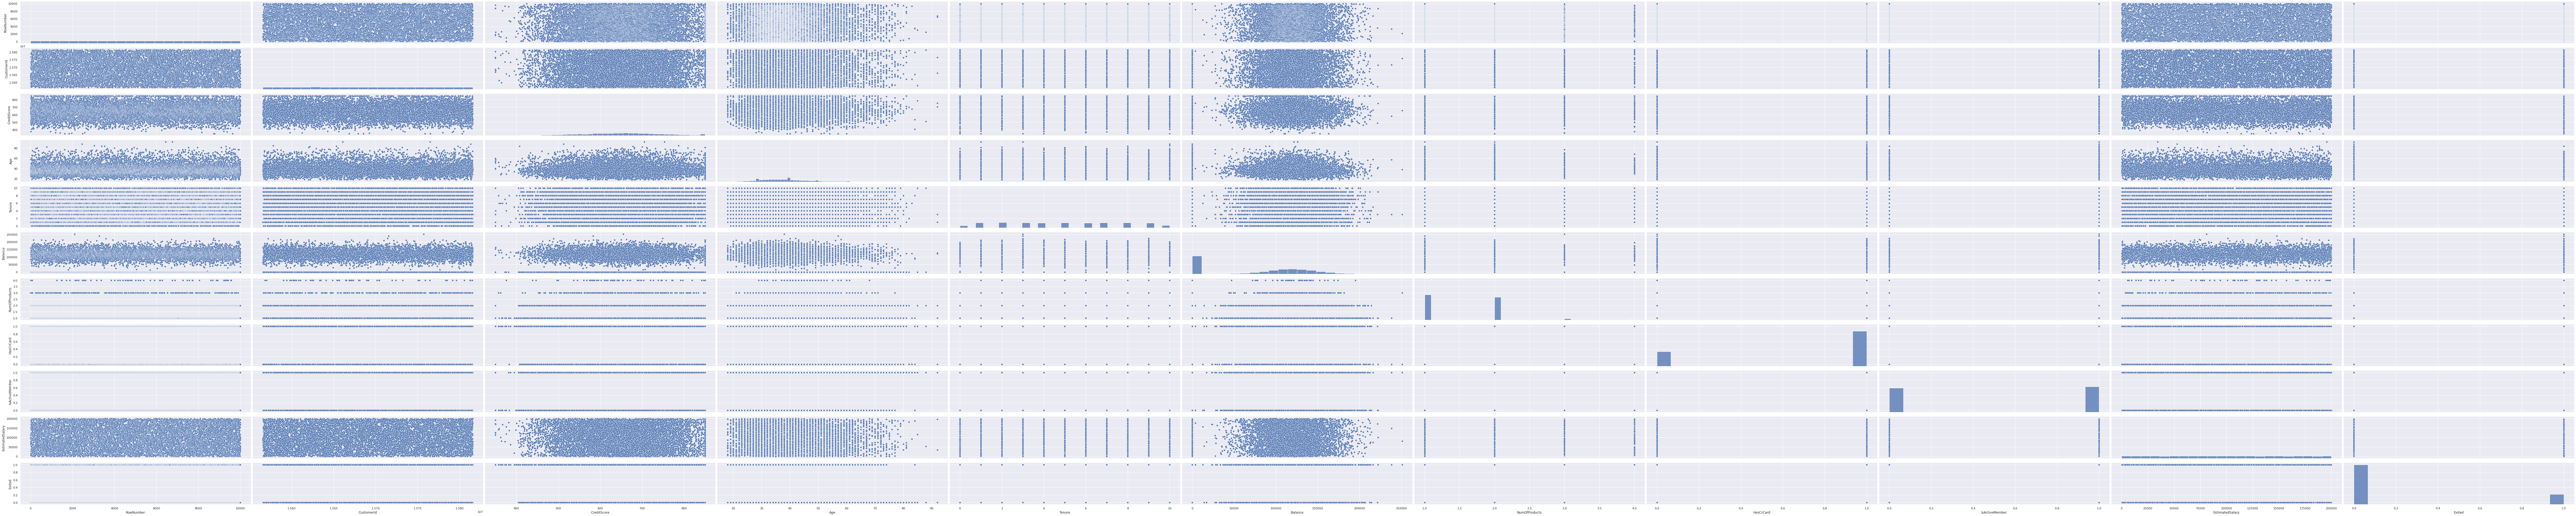

In [12]:
sns.pairplot(data=df,aspect=5);

PERFORM DESCRIPTIVE ANALYSIS

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [14]:
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

### Handle the Missing values.

In [15]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Find the outliers and replace the outliers

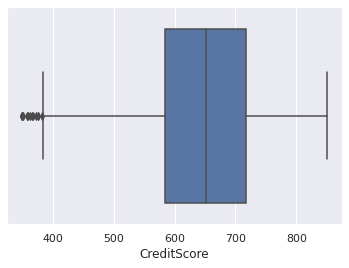

In [16]:
sns.boxplot(x=df['CreditScore'])

In [17]:
Q1=df['CreditScore'].quantile(0.25)
Q2=df['CreditScore'].quantile(0.75)
print(Q1,Q2)

584.0 718.0


# Check for Categorical columns and perform encoding.

In [18]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [19]:
le=LabelEncoder()

In [20]:
df['Gender']=le.fit_transform(df['Gender'])
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France       0   42   
1          2    15647311      Hill          608     Spain       0   41   
2          3    15619304      Onio          502    France       0   42   
3          4    15701354      Boni          699    France       0   39   
4          5    15737888  Mitchell          850     Spain       0   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

### Split the data into dependent and independent variables.

In [21]:
df.tail()

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
9995       9996    15606229   Obijiaku          771    France       1   39   
9996       9997    15569892  Johnstone          516    France       1   35   
9997       9998    15584532        Liu          709    France       0   36   
9998       9999    15682355  Sabbatini          772   Germany       1   42   
9999      10000    15628319     Walker          792    France       0   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0

In [23]:
X=df.drop(columns=['CreditScore'],axis=1)
X.head()

RowNumber  CustomerId   Surname Geography  Gender  Age  Tenure    Balance  \
0          1    15634602  Hargrave    France       0   42       2       0.00   
1          2    15647311      Hill     Spain       0   41       1   83807.86   
2          3    15619304      Onio    France       0   42       8  159660.80   
3          4    15701354      Boni    France       0   39       1       0.00   
4          5    15737888  Mitchell     Spain       0   43       2  125510.82   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0              1          1               1        101348.88       1  
1              1          0               1        112542.58       0  
2              3          1               0        113931.57       1  
3              2          0               0         93826.63       0  
4              1          1               1         79084.10       0

In [24]:
Y=df['CreditScore']
Y

0       619
1       608
2       502
3       699
4       850
       ... 
9995    771
9996    516
9997    709
9998    772
9999    792
Name: CreditScore, Length: 10000, dtype: int64

### Scale the independent variables

In [26]:
X=df.drop(columns=['Surname','Geography','Gender'],axis=1)
X.head()

RowNumber  CustomerId  CreditScore  Age  Tenure    Balance  NumOfProducts  \
0          1    15634602          619   42       2       0.00              1   
1          2    15647311          608   41       1   83807.86              1   
2          3    15619304          502   42       8  159660.80              3   
3          4    15701354          699   39       1       0.00              2   
4          5    15737888          850   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [27]:
X_scaled=pd.DataFrame(scale(X),columns=X.columns)
X.head()

RowNumber  CustomerId  CreditScore  Age  Tenure    Balance  NumOfProducts  \
0          1    15634602          619   42       2       0.00              1   
1          2    15647311          608   41       1   83807.86              1   
2          3    15619304          502   42       8  159660.80              3   
3          4    15701354          699   39       1       0.00              2   
4          5    15737888          850   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

# Split the data into training and testing

In [28]:
X.shape

(10000, 11)

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.3,random_state=0)

In [30]:
X_train

RowNumber  CustomerId  CreditScore       Age    Tenure   Balance  \
7681   0.928899   -0.797032    -0.098592 -0.564665 -1.041760  1.117213   
9031   1.396553    0.714314    -1.133270  0.007457  0.687130 -1.225848   
3691  -0.453278    0.963450    -0.626278  3.535540 -0.004426  1.354191   
202   -1.661903   -1.250707    -1.391939  1.056346 -0.004426 -1.225848   
5625   0.216680   -0.385174    -1.474714  2.009882  0.687130  1.070229   
...         ...         ...          ...       ...       ...       ...   
9225   1.463756   -1.473777    -0.584891 -0.660018 -0.350204  0.698607   
4859  -0.048671   -0.609314     1.484464 -1.613554 -0.350204  0.608299   
3264  -0.601195   -1.620525     0.905045 -0.373958 -0.004426  1.358909   
9845   1.678530   -0.374039    -0.626278 -0.087897  1.378686 -1.225848   
2732  -0.785485   -1.364118    -0.284834  0.865639 -1.387538  0.506303   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary    Exited  
7681       0.807737   0.646092        0.970243        -0.770218  1.977165  
9031       0.807737   0.646092       -1.030670        -1.395767 -0.505775  
3691      -0.911583  -1.547768        0.970243        -1.499656 -0.505775  
202       -0.911583  -1.547768        0.970243         0.800862  1.977165  
5625      -0.911583   0.646092        0.970243         0.512497 -0.505775  
...             ...        ...             ...              ...       ...  
9225       0.807737   0.646092        0.970243         1.093273 -0.505775  
4859      -0.911583   0.646092        0.970243         0.133249 -0.505775  
3264       0.807737   0.646092       -1.030670         1.414415 -0.505775  
9845       0.807737   0.646092        0.970243         0.846147 -0.505775  
2732      -0.911583   0.646092       -1.030670         0.326305  1.977165  

[7000 rows x 11 columns]